In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
import random
from sklearn.metrics import classification_report

# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [3]:
# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –∫ –±–∞–∑–µ –¥–∞–Ω–Ω—ã—Ö
db_path = r"C:\Users\Evgeniya\OneDrive\Desktop\–î–æ–º–∞—à–Ω—è—è\–ò—Ç–æ–≥–æ–≤—ã–π –ø—Ä–æ–µ–∫—Ç –∞–Ω–∞–ª–∏—Ç–∏–∫–∞\data\result_data\shop_database.db"
conn = sqlite3.connect(db_path)

In [4]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ —Ç–∞–±–ª–∏—Ü
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(tables_query, conn)
tables

name
0             purchases
1  personal_data_coeffs
2         personal_data

In [5]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –≤—Å–µ—Ö —Ç–∞–±–ª–∏—Ü –∏–∑ –±–∞–∑—ã –¥–∞–Ω–Ω—ã—Ö
personal_data = pd.read_sql("SELECT * FROM personal_data", conn)
personal_data_coeffs = pd.read_sql("SELECT * FROM personal_data_coeffs", conn)
purchases = pd.read_sql("SELECT * FROM purchases", conn)


In [6]:
# –ü—Ä–æ—Å–º–æ—Ç—Ä —Ä–∞–∑–º–µ—Ä–æ–≤ –∑–∞–≥—Ä—É–∂–µ–Ω–Ω—ã—Ö —Ç–∞–±–ª–∏—Ü
{
    "personal_data": personal_data.shape,
    "personal_data_coeffs": personal_data_coeffs.shape,
    "purchases": purchases.shape
}

{'personal_data': (89241, 6),
 'personal_data_coeffs': (104989, 5),
 'purchases': (786260, 7)}

In [7]:
personal_data.head()

id  gender  age education  city  country
0   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32
1   4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32
2   6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32
3   7       0   37   —Å—Ä–µ–¥–Ω–µ–µ  1198       32
4   9       0   48   —Å—Ä–µ–¥–Ω–µ–µ  1134       32

In [8]:
personal_data_coeffs.head()

id  lbt_coef   ac_coef   sm_coef  personal_coef
0   0  5.078678 -0.307147  0.959027         0.5072
1   3  7.764766 -0.030225  0.794720         0.4304
2   4  4.569378  0.063693  0.820892         0.5072
3   6  8.150379  0.075200  0.836140         0.4304
4   7  5.188231 -0.000134  0.944113         0.5072

In [9]:
purchases.head()

id                                            product       colour   cost  \
0   0        –í–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π Stern Mira 2.0 26"  –±–µ–ª—ã–π/—Å–∏–Ω–∏–π  13599   
1   0                                    –°—Ç–æ–ª Outventure      –∑–µ–ª—ë–Ω—ã–π   1499   
2   0                   –ù–∞–±–æ—Ä Outventure: —Å—Ç–æ–ª + 4 —Å—Ç—É–ª–∞      –±–µ–∂–µ–≤—ã–π   4799   
3   3                            –ë—É—Ç—Å—ã –º—É–∂—Å–∫–∏–µ GSD Astro        –±–µ–ª—ã–π   1599   
4   3  –ú—è—á —Ñ—É—Ç–±–æ–ª—å–Ω—ã–π PUMA TEAMFINAL 21.2 FIFA QUALIT...   –º—É–ª—å—Ç–∏—Ü–≤–µ—Ç   7199   

   product_sex  base_sale  dt  
0          0.0          1   7  
1          NaN          0  37  
2          NaN          0  37  
3          1.0          0  13  
4          NaN          0  27

In [10]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–∑ —Å—Ç—Ä–∞–Ω—ã 32
personal_data_country_32 = personal_data[personal_data['country'] == 32]

In [11]:
# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü
merged_data = personal_data_country_32.merge(personal_data_coeffs, on='id', how='left')
full_data = merged_data.merge(purchases, on='id', how='left')

In [12]:
# –†–∞–∑–º–µ—Ä –æ–±—ä–µ–¥–∏–Ω—ë–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
full_data.shape

(664665, 16)

In [13]:
full_data.head()

id  gender  age education  city  country  lbt_coef   ac_coef   sm_coef  \
0   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147  0.959027   
1   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147  0.959027   
2   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147  0.959027   
3   4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32  4.569378  0.063693  0.820892   
4   4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32  4.569378  0.063693  0.820892   

   personal_coef                                      product          colour  \
0         0.5072  –í–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π Stern Mira 2.0 26"     –±–µ–ª—ã–π/—Å–∏–Ω–∏–π   
1         0.5072                              –°—Ç–æ–ª Outventure         –∑–µ–ª—ë–Ω—ã–π   
2         0.5072             –ù–∞–±–æ—Ä Outventure: —Å—Ç–æ–ª + 4 —Å—Ç—É–ª–∞         –±–µ–∂–µ–≤—ã–π   
3         0.5072   –†–æ–ª–∏–∫–æ–≤—ã–µ –∫–æ–Ω—å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ Roces Orlando III  —á–µ—Ä–Ω—ã–π/—Ä–æ–∑–æ–≤—ã–π   
4         0.5072                            –®–ª–µ–º FILA NRK FUN           –±–µ–ª—ã–π   

    cost  product_sex  base_sale  dt  
0  13599          0.0          1   7  
1   1499          NaN          0  37  
2   4799          NaN          0  37  
3   9199          NaN          0   0  
4   4999          NaN          0   0

In [14]:
# —Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ 
full_data.isnull().sum()

id                    0
gender                0
age                   0
education             0
city                  0
country               0
lbt_coef              0
ac_coef               0
sm_coef               0
personal_coef         0
product               0
colour           101589
cost                  0
product_sex      266512
base_sale             0
dt                    0
dtype: int64

In [15]:
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞–∑–≤–∞–Ω–∏–π —Ç–æ–≤–∞—Ä–æ–≤ (product)
full_data["product"] = (full_data["product"].str.lower().str.strip().str.replace(r"[^–∞-—èa-z0-9\s]", "", regex=True))


In [16]:
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —Ü–≤–µ—Ç–æ–≤
full_data["colour"] = (full_data["colour"].str.lower().str.strip())


In [17]:
full_data.head()

id  gender  age education  city  country  lbt_coef   ac_coef   sm_coef  \
0   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147  0.959027   
1   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147  0.959027   
2   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147  0.959027   
3   4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32  4.569378  0.063693  0.820892   
4   4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32  4.569378  0.063693  0.820892   

   personal_coef                                     product          colour  \
0         0.5072   –≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π stern mira 20 26     –±–µ–ª—ã–π/—Å–∏–Ω–∏–π   
1         0.5072                             —Å—Ç–æ–ª outventure         –∑–µ–ª—ë–Ω—ã–π   
2         0.5072              –Ω–∞–±–æ—Ä outventure —Å—Ç–æ–ª  4 —Å—Ç—É–ª–∞         –±–µ–∂–µ–≤—ã–π   
3         0.5072  —Ä–æ–ª–∏–∫–æ–≤—ã–µ –∫–æ–Ω—å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ roces orlando iii  —á–µ—Ä–Ω—ã–π/—Ä–æ–∑–æ–≤—ã–π   
4         0.5072                           —à–ª–µ–º fila nrk fun           –±–µ–ª—ã–π   

    cost  product_sex  base_sale  dt  
0  13599          0.0          1   7  
1   1499          NaN          0  37  
2   4799          NaN          0  37  
3   9199          NaN          0   0  
4   4999          NaN          0   0

In [18]:
# –≤ colour –µ—Å—Ç—å /. –†–∞–∑–æ–±—Ä–∞–≤ –ø—Ä–µ–¥—Å—Ç–æ—è—â–∏–µ –∑–∞–¥–∞—á–∏, –ø—Ä–∏—à–ª–∞ –∫ –≤—ã–≤–æ–¥—É, 
# —á—Ç–æ –ª—É—á—à–µ –æ—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—ã–π —Ü–≤–µ—Ç ‚Äî —ç—Ç–æ –Ω–∞–∏–ª—É—á—à–∏–π –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É –ø—Ä–æ—Å—Ç–æ—Ç–æ–π –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å—é.
full_data["colour"] = (full_data["colour"].str.split("/").str[0])          


In [19]:
full_data

id  gender  age education  city  country  lbt_coef   ac_coef  \
0            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147   
1            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147   
2            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147   
3            4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32  4.569378  0.063693   
4            4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32  4.569378  0.063693   
...        ...     ...  ...       ...   ...      ...       ...       ...   
664660  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   
664661  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   
664662  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   
664663  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   
664664  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   

         sm_coef  personal_coef                                     product  \
0       0.959027         0.5072   –≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π stern mira 20 26   
1       0.959027         0.5072                             —Å—Ç–æ–ª outventure   
2       0.959027         0.5072              –Ω–∞–±–æ—Ä outventure —Å—Ç–æ–ª  4 —Å—Ç—É–ª–∞   
3       0.820892         0.5072  —Ä–æ–ª–∏–∫–æ–≤—ã–µ –∫–æ–Ω—å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ roces orlando iii   
4       0.820892         0.5072                           —à–ª–µ–º fila nrk fun   
...          ...            ...                                         ...   
664660  0.938592         0.4688            –ø–æ–ª—É–±–æ—Ç–∏–Ω–∫–∏ –º—É–∂—Å–∫–∏–µ ascot vortex   
664661  0.938592         0.4688           –∫—Ä–æ—Å—Å–æ–≤–∫–∏ –º—É–∂—Å–∫–∏–µ nike air max 90   
664662  0.938592         0.4688           –∫—Ä–æ—Å—Å–æ–≤–∫–∏ –º—É–∂—Å–∫–∏–µ nike air max 90   
664663  0.938592         0.4688                                       –ø–∞–∫–µ—Ç   
664664  0.938592         0.4688      –ø–æ–ª—É–±–æ—Ç–∏–Ω–∫–∏ –º—É–∂—Å–∫–∏–µ columbia crestwood   

            colour   cost  product_sex  base_sale  dt  
0            –±–µ–ª—ã–π  13599          0.0          1   7  
1          –∑–µ–ª—ë–Ω—ã–π   1499          NaN          0  37  
2          –±–µ–∂–µ–≤—ã–π   4799          NaN          0  37  
3           —á–µ—Ä–Ω—ã–π   9199          NaN          0   0  
4            –±–µ–ª—ã–π   4999          NaN          0   0  
...            ...    ...          ...        ...  ..  
664660        —Ö–∞–∫–∏   7999          1.0          0  12  
664661      —á–µ—Ä–Ω—ã–π  24299          1.0          0  13  
664662      —á–µ—Ä–Ω—ã–π  24299          1.0          0  20  
664663  –∫–æ—Ä–∏—á–Ω–µ–≤—ã–π     12          NaN          0  20  
664664       —Å–∏–Ω–∏–π   7999          1.0          0  20  

[664665 rows x 16 columns]

# 2. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

In [21]:
train_df = full_data.copy()

In [22]:
full_data["gender"].unique()

array([0, 1], dtype=int64)

In [23]:
# –ö–æ–¥–∏—Ä–æ–≤–∫–∞ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
le = LabelEncoder()
train_df["education_enc"] = le.fit_transform(train_df["education"])

In [24]:
# –ü—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
X = train_df[["age", "city", "personal_coef", "education_enc"]]
y = train_df["gender"]

In [25]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [26]:
#  –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ 
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1-score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 4))

Accuracy: 1.0
F1-score: 1.0
ROC AUC: 1.0


In [28]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –ø–æ—Ç–µ—Ä—è–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–ª–∏—á–Ω—ã—Ö)
personal_data = pd.read_csv(r"C:\Users\Evgeniya\OneDrive\Desktop\–î–æ–º–∞—à–Ω—è—è\–ò—Ç–æ–≥–æ–≤—ã–π –ø—Ä–æ–µ–∫—Ç –∞–Ω–∞–ª–∏—Ç–∏–∫–∞\personal_data.csv")
personal_data.head()

id  age education  city  country
0  101492   32   —Å—Ä–µ–¥–Ω–µ–µ  1188       32
1   42690   20    –≤—ã—Å—à–µ–µ  1134       32
2  113001   27   —Å—Ä–µ–¥–Ω–µ–µ  1187       32
3  163654   49    –≤—ã—Å—à–µ–µ  1160       32
4   69523   44   —Å—Ä–µ–¥–Ω–µ–µ  1137       32

In [29]:
personal_data.shape

(15748, 5)

In [30]:
personal_data = personal_data.rename(columns={"id": "client_id"})
personal_data_coeffs = personal_data_coeffs.rename(columns={"id": "client_id"})


In [31]:
personal_data = personal_data.merge(personal_data_coeffs[["client_id", "personal_coef"]], on="client_id", how="left")

In [32]:
personal_data["education_enc"] = le.transform(personal_data["education"])

In [33]:
personal_data.head()

client_id  age education  city  country  personal_coef  education_enc
0     101492   32   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304              1
1      42690   20    –≤—ã—Å—à–µ–µ  1134       32         0.4688              0
2     113001   27   —Å—Ä–µ–¥–Ω–µ–µ  1187       32         0.4304              1
3     163654   49    –≤—ã—Å—à–µ–µ  1160       32         0.5584              0
4      69523   44   —Å—Ä–µ–¥–Ω–µ–µ  1137       32         0.5072              1

In [34]:
# –ü—Ä–∏–∑–Ω–∞–∫–∏
X_missing = personal_data[["age", "city", "personal_coef", "education_enc"]]

In [35]:
#  –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ 
predicted = clf.predict(X_missing)
personal_data["predicted_gender"] = predicted


In [36]:
personal_data.head()

client_id  age education  city  country  personal_coef  education_enc  \
0     101492   32   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304              1   
1      42690   20    –≤—ã—Å—à–µ–µ  1134       32         0.4688              0   
2     113001   27   —Å—Ä–µ–¥–Ω–µ–µ  1187       32         0.4304              1   
3     163654   49    –≤—ã—Å—à–µ–µ  1160       32         0.5584              0   
4      69523   44   —Å—Ä–µ–¥–Ω–µ–µ  1137       32         0.5072              1   

   predicted_gender  
0                 1  
1                 1  
2                 1  
3                 0  
4                 0

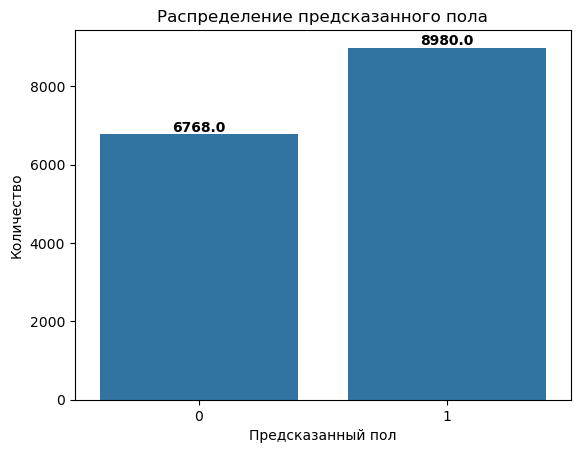

In [37]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –ø–æ–ª–∞:

ax = sns.countplot(x="predicted_gender", data=personal_data)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –ø–æ–ª–∞")
plt.xlabel("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –ø–æ–ª")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

# 3. A/B —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

In [39]:
# –û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –Ω—É–∂–Ω—ã–º –¥–Ω—è–º –∫–∞–º–ø–∞–Ω–∏–∏: —Å 5-–≥–æ –ø–æ 16-–π –¥–µ–Ω—å
campaign_period = full_data[(full_data["dt"] >= 5) & (full_data["dt"] <= 16)]
campaign_period

id  gender  age education  city  country  lbt_coef   ac_coef  \
0            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147   
12           6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32  8.150379  0.075200   
13           6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32  8.150379  0.075200   
14           6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32  8.150379  0.075200   
15           6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32  8.150379  0.075200   
...        ...     ...  ...       ...   ...      ...       ...       ...   
664657  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   
664658  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   
664659  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   
664660  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   
664661  178004       1   52    –≤—ã—Å—à–µ–µ  1188       32  8.437832 -0.080251   

         sm_coef  personal_coef                                     product  \
0       0.959027         0.5072   –≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π stern mira 20 26   
12      0.836140         0.4304       —Ñ—É—Ç–±–æ–ª–∫–∞ –º—É–∂—Å–∫–∞—è kappa authentic core   
13      0.836140         0.4304       –±–µ–π—Å–±–æ–ª–∫–∞ –¥–µ—Ç—Å–∫–∞—è nike futura mash up   
14      0.836140         0.4304                  –Ω–æ—Å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ demix 2 –ø–∞—Ä—ã   
15      0.836140         0.4304  –∫—Ä–æ—Å—Å–æ–≤–∫–∏ –º—É–∂—Å–∫–∏–µ adidas lite racer cln 20   
...          ...            ...                                         ...   
664657  0.938592         0.4688           –∫—Ä–æ—Å—Å–æ–≤–∫–∏ –º—É–∂—Å–∫–∏–µ nike air max sc   
664658  0.938592         0.4688                –∫—Ä–æ—Å—Å–æ–≤–∫–∏ –º—É–∂—Å–∫–∏–µ fila regen   
664659  0.938592         0.4688               –∂–∏–ª–µ—Ç –º—É–∂—Å–∫–æ–π icepeak manheim   
664660  0.938592         0.4688            –ø–æ–ª—É–±–æ—Ç–∏–Ω–∫–∏ –º—É–∂—Å–∫–∏–µ ascot vortex   
664661  0.938592         0.4688           –∫—Ä–æ—Å—Å–æ–≤–∫–∏ –º—É–∂—Å–∫–∏–µ nike air max 90   

             colour   cost  product_sex  base_sale  dt  
0             –±–µ–ª—ã–π  13599          0.0          1   7  
12      —Ç–µ–º–Ω–æ-—Å–∏–Ω–∏–π    999          1.0          0   8  
13            —Å–∏–Ω–∏–π   1119          NaN          1  11  
14            —Å–∏–Ω–∏–π    299          NaN          0  11  
15           —á–µ—Ä–Ω—ã–π   7399          1.0          0  11  
...             ...    ...          ...        ...  ..  
664657        —Å–µ—Ä—ã–π  13999          1.0          0   6  
664658         None   5999          1.0          0   9  
664659         None   8699          1.0          0   9  
664660         —Ö–∞–∫–∏   7999          1.0          0  12  
664661       —á–µ—Ä–Ω—ã–π  24299          1.0          0  13  

[193949 rows x 16 columns]

In [40]:
# –ß—Ç–µ–Ω–∏–µ –∏ –∏–∑–≤–ª–µ—á–µ–Ω–∏–µ ID

with open(r"C:\Users\Evgeniya\OneDrive\Desktop\–î–æ–º–∞—à–Ω—è—è\–ò—Ç–æ–≥–æ–≤—ã–π –ø—Ä–æ–µ–∫—Ç –∞–Ω–∞–ª–∏—Ç–∏–∫–∞\data\result_data\ids_first_company_positive.txt", encoding="utf-8") as f:
    positive_ids = pd.DataFrame({"client_id": list(map(int, re.findall(r"\d+", f.read())))})
positive_ids["group"] = "A"

with open(r"C:\Users\Evgeniya\OneDrive\Desktop\–î–æ–º–∞—à–Ω—è—è\–ò—Ç–æ–≥–æ–≤—ã–π –ø—Ä–æ–µ–∫—Ç –∞–Ω–∞–ª–∏—Ç–∏–∫–∞\data\result_data\ids_first_company_negative.txt", "r", encoding="utf-8") as f:
    negative_ids = pd.DataFrame({"client_id": list(map(int, re.findall(r"\d+", f.read())))})
negative_ids["group"] = "B"

In [41]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≥—Ä—É–ø–ø—ã
ab_test = pd.concat([positive_ids, negative_ids], ignore_index=True)
ab_test

client_id group
0          88128     A
1         171960     A
2         142117     A
3         114589     A
4         146123     A
...          ...   ...
10039      89121     B
10040     161445     B
10041     162570     B
10042      92547     B
10043     120689     B

[10044 rows x 2 columns]

In [42]:
# –ü—Ä–∏–∑–Ω–∞–∫ —Ñ–∞–∫—Ç–∞ –ø–æ–∫—É–ø–∫–∏
ab_test["made_purchase"] = ab_test["client_id"].isin(campaign_period["id"]).astype(int)
ab_test.head()

client_id group  made_purchase
0      88128     A              1
1     171960     A              1
2     142117     A              1
3     114589     A              1
4     146123     A              1

In [43]:
# –ü–æ–¥—Å—á—ë—Ç –∫–æ–Ω–≤–µ—Ä—Å–∏–π
conversion_stats = ab_test.groupby("group")["made_purchase"].agg(["count", "sum"])
conversion_stats["conversion_rate"] = (conversion_stats["sum"] / conversion_stats["count"]).round(2)
conversion_stats

count   sum  conversion_rate
group                              
A       5023  4063             0.81
B       5021  4199             0.84

In [44]:
conversion_stats["conversion_rate_percent"] = (conversion_stats["conversion_rate"] * 100).round(2)

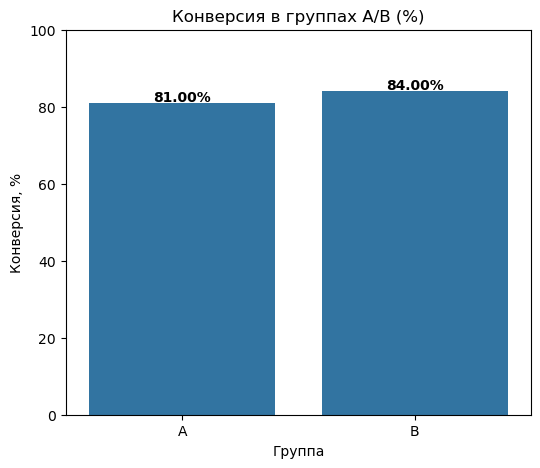

In [45]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Å –ø–æ–¥–ø–∏—Å—è–º–∏
plt.figure(figsize=(6, 5))
sns.barplot(x="group", y="conversion_rate_percent", data=conversion_stats)
plt.title("–ö–æ–Ω–≤–µ—Ä—Å–∏—è –≤ –≥—Ä—É–ø–ø–∞—Ö A/B (%)")
plt.ylabel("–ö–æ–Ω–≤–µ—Ä—Å–∏—è, %")
plt.xlabel("–ì—Ä—É–ø–ø–∞")

# –ü–æ–¥–ø–∏—Å–∏ –Ω–∞–¥ —Å—Ç–æ–ª–±—Ü–∞–º–∏
for index, row in conversion_stats.iterrows():
    plt.text(index, row["conversion_rate_percent"] + 0.5, f'{row["conversion_rate_percent"]:.2f}%', 
             color='black', ha="center", fontweight='bold')

plt.ylim(0, 100)
plt.show()

In [46]:
# –†–∞—Å—á–µ—Ç Z -—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:
# –£—Å–ø–µ—Ö–∏ (–ø–æ–∫—É–ø–∫–∏)
successes = [4063, 4199]
# –†–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫
nobs = [5023, 5021]

In [47]:
# Z-—Ç–µ—Å—Ç
z_stat, p_val = proportions_ztest(count=successes, nobs=nobs, alternative='two-sided')
print (z_stat, p_val)

-3.5951570312320165 0.00032419596862596947


## –í—ã–≤–æ–¥: –º—ã –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–ª–∏ –≥–∏–ø–æ—Ç–µ–∑—É:
 - H‚ÇÄ (–Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞): –ö–æ–Ω–≤–µ—Ä—Å–∏–∏ –≤ –≥—Ä—É–ø–ø–∞—Ö A –∏ B —Ä–∞–≤–Ω—ã;
 - H‚ÇÅ (–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞): –ö–æ–Ω–≤–µ—Ä—Å–∏–∏ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è.

Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: ‚àí3.6
P-value: < 0.0001 

‚úÖ –†–∞–∑–Ω–∏—Ü–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞ ‚Äî –∫–∞–º–ø–∞–Ω–∏—è A –ø–æ–∫–∞–∑–∞–ª–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ö—É–∂–µ, —á–µ–º –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–∞—è –≥—Ä—É–ø–ø–∞.


–ì—Ä—É–ø–ø–∞	              –£—Å–ø–µ—Ö–æ–≤ (–ø–æ–∫—É–ø–æ–∫)	   –í—Å–µ–≥–æ –∫–ª–∏–µ–Ω—Ç–æ–≤	–ö–æ–Ω–≤–µ—Ä—Å–∏—è
A (—Å–æ —Å–∫–∏–¥–∫–æ–π)	           4063	              5023	         0.81
B (–±–µ–∑ —Å–∫–∏–¥–∫–∏)	           4199	              5021	         0.84


 * P-value < 0.05 ‚Üí –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É;
 * –†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞;
 * –ì—Ä—É–ø–ø–∞ –±–µ–∑ —Å–∫–∏–¥–∫–∏ (B) –ø–æ–∫–∞–∑–∞–ª–∞ –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ—Å–ª—É—á–∞–π–Ω–æ.

**–í—ã–≤–æ–¥:**
1. –ü—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω–æ–π —Å–∫–∏–¥–∫–∏ –Ω–µ –ø–æ–≤—ã—Å–∏–ª–æ, –∞ —Å–Ω–∏–∑–∏–ª–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–æ–∫—É–ø–∫–∏.
2. –° –≤—ã—Å–æ–∫–æ–π –¥–æ–ª–µ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ ‚Äî —Å–∫–∏–¥–∫–∞ –≤–æ—Å–ø—Ä–∏–Ω–∏–º–∞–ª–∞—Å—å –∫–∞–∫ –ª–∏—à–Ω—è—è, –Ω–µ—É–º–µ—Å—Ç–Ω–∞—è –∏–ª–∏ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–∞—è.
3. –ö–∞–º–ø–∞–Ω–∏—è –æ–∫–∞–∑–∞–ª–∞—Å—å –Ω–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π –∏, –≤–æ–∑–º–æ–∂–Ω–æ, –¥–∞–∂–µ –≤—Ä–µ–¥–Ω–æ–π –¥–ª—è –≤—ã—Ä—É—á–∫–∏.

**–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:**
 - –û—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–µ email-—Å–∫–∏–¥–æ–∫ –≤ —Ç–µ–∫—É—â–µ–º —Ñ–æ—Ä–º–∞—Ç–µ.
 - –ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –≤–∏–¥—ã —Å—Ç–∏–º—É–ª–æ–≤:
                      –ë–æ–Ω—É—Å—ã, –ø–æ–¥–∞—Ä–∫–∏, –ª–æ—Ç–µ—Ä–µ–∏;
 - –ò–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ, –∞ –Ω–µ –Ω–∞–≤—è–∑—ã–≤–∞–Ω–∏–µ —Å–∫–∏–¥–∫–∏.
 - –ü—Ä–æ–≤–µ—Å—Ç–∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é –∫–ª–∏–µ–Ω—Ç–æ–≤:
   –í—ã—è–≤–∏—Ç—å –≥—Ä—É–ø–ø—ã, –∫–æ—Ç–æ—Ä—ã–º –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω—É–∂–Ω—ã —Å–∫–∏–¥–∫–∏;
   –ü—Ä–µ–¥–ª–∞–≥–∞—Ç—å –ø–µ—Ä—Å–æ–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å—Ç–∏–º—É–ª—ã –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º.

# 4. –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è

In [50]:
#  –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º —Å—Ç–æ–ª–±—Ü—ã –≤ personal_data
personal_data.rename(columns={"client_id": "id", "predicted_gender": "gender"}, inplace=True)

In [51]:
# –£–¥–∞–ª–∏–º –ø–æ–ª–Ω–æ—Å—Ç—å—é –ø—É—Å—Ç—ã–µ (–≤—Å–µ NaN) —Å—Ç–æ–ª–±—Ü—ã –≤ personal_data –ø–µ—Ä–µ–¥ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ–º
personal_data_cleaned = personal_data.dropna(axis=1, how="all")

# –ü–æ–≤—Ç–æ—Ä–∏–º –≤—ã—Ä–∞–≤–Ω–∏–≤–∞–Ω–∏–µ –∫–æ–ª–æ–Ω–æ–∫
for col in full_data.columns:
    if col not in personal_data_cleaned.columns:
        personal_data_cleaned[col] = None

# –£–ø–æ—Ä—è–¥–æ—á–∏–º –∫–æ–ª–æ–Ω–∫–∏ –∏ –æ–±—ä–µ–¥–∏–Ω–∏–º
personal_data_cleaned = personal_data_cleaned[full_data.columns]
full_data_all = pd.concat([full_data, personal_data_cleaned], ignore_index=True)
full_data_all.head()


C:\Users\Evgeniya\AppData\Local\Temp\ipykernel_9412\3064333198.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_data_all = pd.concat([full_data, personal_data_cleaned], ignore_index=True)


id  gender  age education  city  country  lbt_coef   ac_coef   sm_coef  \
0   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147  0.959027   
1   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147  0.959027   
2   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32  5.078678 -0.307147  0.959027   
3   4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32  4.569378  0.063693  0.820892   
4   4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32  4.569378  0.063693  0.820892   

   personal_coef                                     product   colour   cost  \
0         0.5072   –≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π stern mira 20 26    –±–µ–ª—ã–π  13599   
1         0.5072                             —Å—Ç–æ–ª outventure  –∑–µ–ª—ë–Ω—ã–π   1499   
2         0.5072              –Ω–∞–±–æ—Ä outventure —Å—Ç–æ–ª  4 —Å—Ç—É–ª–∞  –±–µ–∂–µ–≤—ã–π   4799   
3         0.5072  —Ä–æ–ª–∏–∫–æ–≤—ã–µ –∫–æ–Ω—å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ roces orlando iii   —á–µ—Ä–Ω—ã–π   9199   
4         0.5072                           —à–ª–µ–º fila nrk fun    –±–µ–ª—ã–π   4999   

   product_sex base_sale  dt  
0          0.0         1   7  
1          NaN         0  37  
2          NaN         0  37  
3          NaN         0   0  
4          NaN         0   0

In [52]:
full_data_all.shape

(680413, 16)

In [53]:
full_data_all.isnull().sum()

id                    0
gender                0
age                   0
education             0
city                  0
country               0
lbt_coef          15748
ac_coef           15748
sm_coef           15748
personal_coef         0
product           15748
colour           117337
cost              15748
product_sex      282260
base_sale         15748
dt                15748
dtype: int64

In [54]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –Ω—É–∂–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
columns_to_keep = ["id", "gender", "age", "education", "city", "country", "personal_coef", "product", "cost", "base_sale", "dt"]
data_all = full_data_all[columns_to_keep].copy()
data_all

id  gender  age education  city  country  personal_coef  \
0            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
1            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
2            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
3            4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
4            4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
...        ...     ...  ...       ...   ...      ...            ...   
680408  135183       1   44   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.4304   
680409  125993       1   46   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.4304   
680410  167019       0   71   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
680411  116355       1   32   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304   
680412   15885       1   33   —Å—Ä–µ–¥–Ω–µ–µ  1190       32         0.4304   

                                           product   cost base_sale    dt  
0        –≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π stern mira 20 26  13599         1     7  
1                                  —Å—Ç–æ–ª outventure   1499         0    37  
2                   –Ω–∞–±–æ—Ä outventure —Å—Ç–æ–ª  4 —Å—Ç—É–ª–∞   4799         0    37  
3       —Ä–æ–ª–∏–∫–æ–≤—ã–µ –∫–æ–Ω—å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ roces orlando iii   9199         0     0  
4                                —à–ª–µ–º fila nrk fun   4999         0     0  
...                                            ...    ...       ...   ...  
680408                                        None   None      None  None  
680409                                        None   None      None  None  
680410                                        None   None      None  None  
680411                                        None   None      None  None  
680412                                        None   None      None  None  

[680413 rows x 11 columns]

In [55]:
data_all.isnull().sum()

id                   0
gender               0
age                  0
education            0
city                 0
country              0
personal_coef        0
product          15748
cost             15748
base_sale        15748
dt               15748
dtype: int64

In [56]:
# –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –Ω–∞–º –Ω–µ –Ω—É–∂–Ω—ã–µ –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏, –ø–æ—ç—Ç–æ–º—É –ø–æ–∫–∞ —É–¥–∞–ª–∏–º –∏—Ö:
features_for_clustering = ["gender", "age", "education", "city", "country", "personal_coef"]
cluster_data = data_all.dropna(subset=features_for_clustering).copy()
cluster_data

id  gender  age education  city  country  personal_coef  \
0            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
1            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
2            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
3            4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
4            4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
...        ...     ...  ...       ...   ...      ...            ...   
680408  135183       1   44   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.4304   
680409  125993       1   46   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.4304   
680410  167019       0   71   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
680411  116355       1   32   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304   
680412   15885       1   33   —Å—Ä–µ–¥–Ω–µ–µ  1190       32         0.4304   

                                           product   cost base_sale    dt  
0        –≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π stern mira 20 26  13599         1     7  
1                                  —Å—Ç–æ–ª outventure   1499         0    37  
2                   –Ω–∞–±–æ—Ä outventure —Å—Ç–æ–ª  4 —Å—Ç—É–ª–∞   4799         0    37  
3       —Ä–æ–ª–∏–∫–æ–≤—ã–µ –∫–æ–Ω—å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ roces orlando iii   9199         0     0  
4                                —à–ª–µ–º fila nrk fun   4999         0     0  
...                                            ...    ...       ...   ...  
680408                                        None   None      None  None  
680409                                        None   None      None  None  
680410                                        None   None      None  None  
680411                                        None   None      None  None  
680412                                        None   None      None  None  

[680413 rows x 11 columns]

In [57]:
cluster_data.isnull().sum()

id                   0
gender               0
age                  0
education            0
city                 0
country              0
personal_coef        0
product          15748
cost             15748
base_sale        15748
dt               15748
dtype: int64

In [58]:
# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
le_gender = LabelEncoder()
le_education = LabelEncoder()

cluster_data["gender_enc"] = le_gender.fit_transform(cluster_data["gender"])
cluster_data["education_enc"] = le_education.fit_transform(cluster_data["education"])

In [59]:
# –ù–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X = cluster_data[["age", "gender_enc", "education_enc", "city", "country", "personal_coef"]]

In [60]:
# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# –ù–∞–π–¥–µ–º –ø–æ–¥—Ö–æ–¥—è—â–µ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (–ú–µ—Ç–æ–¥–æ–º KMeans):

X_sample = resample(X_scaled, n_samples=100_000, random_state=42)

scores = []
for k in range(2, 9): 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    scores.append((k, score))

# –ü–æ—Å–º–æ—Ç—Ä–∏–º –æ—Ü–µ–Ω–∫–∏
pd.DataFrame(scores, columns=["k", "silhouette_score"]).sort_values(by="silhouette_score", ascending=False)

k  silhouette_score
5  7          0.646760
4  6          0.611786
6  8          0.609693
3  5          0.556606
2  4          0.515133
1  3          0.514272
0  2          0.425233

## –ø–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ = 7 (–º–∞—Ö silhouette_score)

## –ü–æ–ø—Ä–æ–±—É–µ–º –Ω–∞–π—Ç–∏ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –µ—â–µ –º–µ—Ç–æ–¥–æ–º –ª–æ–∫—Ç—è (Elbow Method):

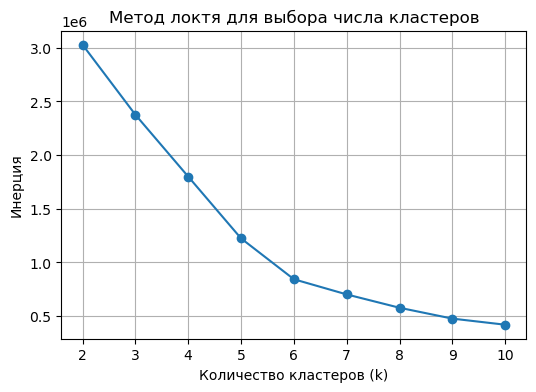

In [64]:
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.title("–ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è –¥–ª—è –≤—ã–±–æ—Ä–∞ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤")
plt.xlabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k)")
plt.ylabel("–ò–Ω–µ—Ä—Ü–∏—è")
plt.xticks(k_range)
plt.grid(True)
plt.show()

## –í—ã–≤–æ–¥:
 - –ì—Ä–∞—Ñ–∏–∫ –∏–Ω–µ—Ä—Ü–∏–∏ –∏–º–µ–µ—Ç —è–≤–Ω–æ –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã–π "–ª–æ–∫–æ—Ç—å" –ø—Ä–∏ k = 4‚Äì5, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, 
   —á—Ç–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ—Å–ª–µ —ç—Ç–æ–π —Ç–æ—á–∫–∏ –Ω–µ –¥–∞—ë—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –≤—ã–∏–≥—Ä—ã—à–∞ –≤ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.
 - –û–¥–Ω–∞–∫–æ –ø—Ä–∏ —ç—Ç–æ–º –º–µ—Ç—Ä–∏–∫–∞ silhouette_score –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞ –ø—Ä–∏ k = 7, –∞ —ç—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ 7 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –¥–∞—ë—Ç –Ω–∞–∏–ª—É—á—à—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É
    ‚Äî –∫–ª–∞—Å—Ç–µ—Ä—ã –ø–ª–æ—Ç–Ω—ã–µ –∏ —Ö–æ—Ä–æ—à–æ –æ—Ç–¥–µ–ª–µ–Ω—ã.
 -  –ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å 7 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∫–∞–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –≤—ã–±–æ—Ä, –ø–æ—Å–∫–æ–ª—å–∫—É silhouette_score —É—á–∏—Ç—ã–≤–∞–µ—Ç –Ω–µ —Ç–æ–ª—å–∫–æ –ø–ª–æ—Ç–Ω–æ—Å—Ç—å, –Ω–æ –∏ –∫–∞—á–µ—Å—Ç–≤–æ –≥—Ä–∞–Ω–∏—Ü –º–µ–∂–¥—É    –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏.   

In [66]:
# –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è KMeans
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
cluster_data["cluster"] = kmeans.fit_predict(X_scaled)
cluster_data.head()

id  gender  age education  city  country  personal_coef  \
0   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
1   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
2   0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
3   4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
4   4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   

                                      product   cost base_sale  dt  \
0   –≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π stern mira 20 26  13599         1   7   
1                             —Å—Ç–æ–ª outventure   1499         0  37   
2              –Ω–∞–±–æ—Ä outventure —Å—Ç–æ–ª  4 —Å—Ç—É–ª–∞   4799         0  37   
3  —Ä–æ–ª–∏–∫–æ–≤—ã–µ –∫–æ–Ω—å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ roces orlando iii   9199         0   0   
4                           —à–ª–µ–º fila nrk fun   4999         0   0   

   gender_enc  education_enc  cluster  
0           0              1        2  
1           0              1        2  
2           0              1        2  
3           0              1        2  
4           0              1        2

In [67]:
# —Å–æ—Ö—Ä–∞–Ω–∏–º cluster_data:
cluster_data.to_csv(r"C:\Users\Evgeniya\OneDrive\Desktop\–î–æ–º–∞—à–Ω—è—è\–ò—Ç–æ–≥–æ–≤—ã–π –ø—Ä–æ–µ–∫—Ç –∞–Ω–∞–ª–∏—Ç–∏–∫–∞\cluster_data.csv", index=False)

## 1. –ü–æ—Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Ç–µ—Ä–µ:

In [69]:
cluster_data.groupby("cluster")[["age", "personal_coef"]].mean()


age  personal_coef
cluster                          
0        41.921788       0.430421
1        39.842268       0.464306
2        42.616114       0.507205
3        31.350000       0.339280
4        15.358595       0.272376
5        26.582789       0.468799
6        29.111101       0.558400

In [70]:
# –ì—Ä–∞–Ω–∏—Ü—ã –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
age_stats = cluster_data.groupby("cluster")["age"].agg(["min", "max", "mean"]).round(1).reset_index()
age_stats

cluster  min  max  mean
0        0   19   77  41.9
1        1    6   77  39.8
2        2   20   77  42.6
3        3   16   50  31.4
4        4    5   22  15.4
5        5   19   66  26.6
6        6   19   74  29.1

## 2. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 

In [72]:
cluster_data.groupby("cluster")["education"].value_counts(normalize=True).unstack()

education    –≤—ã—Å—à–µ–µ   —Å—Ä–µ–¥–Ω–µ–µ
cluster                      
0          0.000710  0.999290
1          0.201890  0.798110
2          0.000093  0.999907
3          0.350000  0.650000
4          0.798875  0.201125
5          1.000000       NaN
6          1.000000       NaN

In [73]:
cluster_data.groupby("cluster")["gender"].value_counts(normalize=True).unstack().round(2)

gender      0     1
cluster            
0         NaN  1.00
1        0.47  0.53
2        1.00   NaN
3        0.30  0.70
4        0.33  0.67
5         NaN  1.00
6        1.00   NaN

## 3. –ö–∞–∫–∏–µ —Ç–æ–≤–∞—Ä—ã –∏ —Å–∫–∏–¥–∫–∏ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞—é—Ç –∫–ª–∞—Å—Ç–µ—Ä—ã:

In [75]:
top_products = cluster_data.groupby("cluster")["product"].value_counts().groupby(level=0).head(3).reset_index(name="count")
cluster_data.groupby("cluster")["product"].value_counts().groupby(level=0).head(3)

cluster  product                 
0        –±—Ä—é–∫–∏ –º—É–∂—Å–∫–∏–µ demix         2441
         —à–æ—Ä—Ç—ã –º—É–∂—Å–∫–∏–µ demix         2140
         —Ñ—É—Ç–±–æ–ª–∫–∞ –º—É–∂—Å–∫–∞—è demix      1732
1        –±—Ä—é–∫–∏ –º—É–∂—Å–∫–∏–µ demix          121
         —à–æ—Ä—Ç—ã –º—É–∂—Å–∫–∏–µ demix          109
         —Ñ—É—Ç–±–æ–ª–∫–∞ –º—É–∂—Å–∫–∞—è demix        94
2        —Ñ—É—Ç–±–æ–ª–∫–∞ –∂–µ–Ω—Å–∫–∞—è demix      1827
         –ª–∏—Ñ –∂–µ–Ω—Å–∫–∏–π joss            1734
         –∫—É–ø–∞–ª—å–Ω–∏–∫ –∂–µ–Ω—Å–∫–∏–π joss      1603
4        –±—Ä—é–∫–∏ –º—É–∂—Å–∫–∏–µ demix          153
         —à–æ—Ä—Ç—ã –º—É–∂—Å–∫–∏–µ nike           146
         —à–æ—Ä—Ç—ã –º—É–∂—Å–∫–∏–µ demix          144
5        —à–æ—Ä—Ç—ã –º—É–∂—Å–∫–∏–µ demix          557
         –±—Ä—é–∫–∏ –º—É–∂—Å–∫–∏–µ demix          468
         —Ñ—É—Ç–±–æ–ª–∫–∞ –º—É–∂—Å–∫–∞—è demix       415
6        —Ñ—É—Ç–±–æ–ª–∫–∞ –∂–µ–Ω—Å–∫–∞—è demix       253
         –ª–µ–≥–∏–Ω—Å—ã –∂–µ–Ω—Å–∫–∏–µ demix        185
         –±—Ä—é–∫–∏ –∂–µ–Ω—Å–

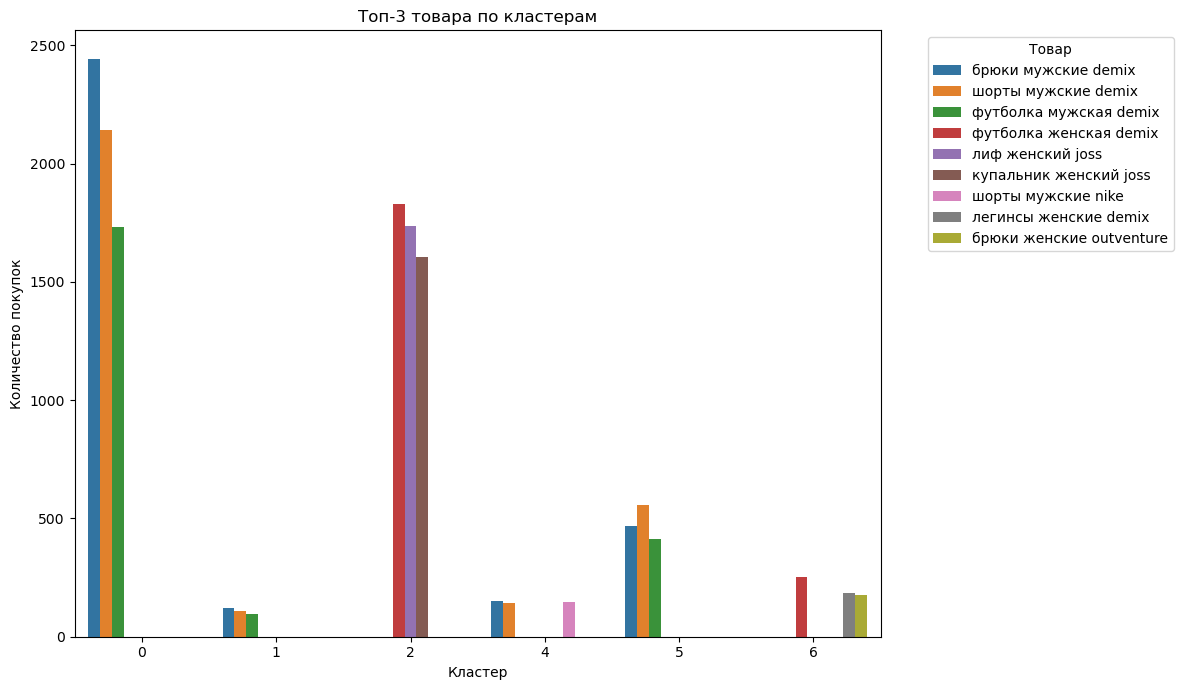

In [76]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 7))
sns.barplot(data=top_products, x="cluster", y="count", hue="product")
plt.title("–¢–æ–ø-3 —Ç–æ–≤–∞—Ä–∞ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º")
plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–æ–∫")
plt.legend(title="–¢–æ–≤–∞—Ä", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [77]:
cluster_data.groupby("cluster")["base_sale"].mean().round(2)

cluster
0    0.310848
1    0.375228
2    0.409758
3         NaN
4    0.357614
5    0.320364
6    0.392714
Name: base_sale, dtype: object

## 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è:

In [79]:
# –≤–≤–µ–¥–µ–º PCA –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_data["pca1"] = X_pca[:, 0]
cluster_data["pca2"] = X_pca[:, 1]

<Figure size 640x480 with 0 Axes>

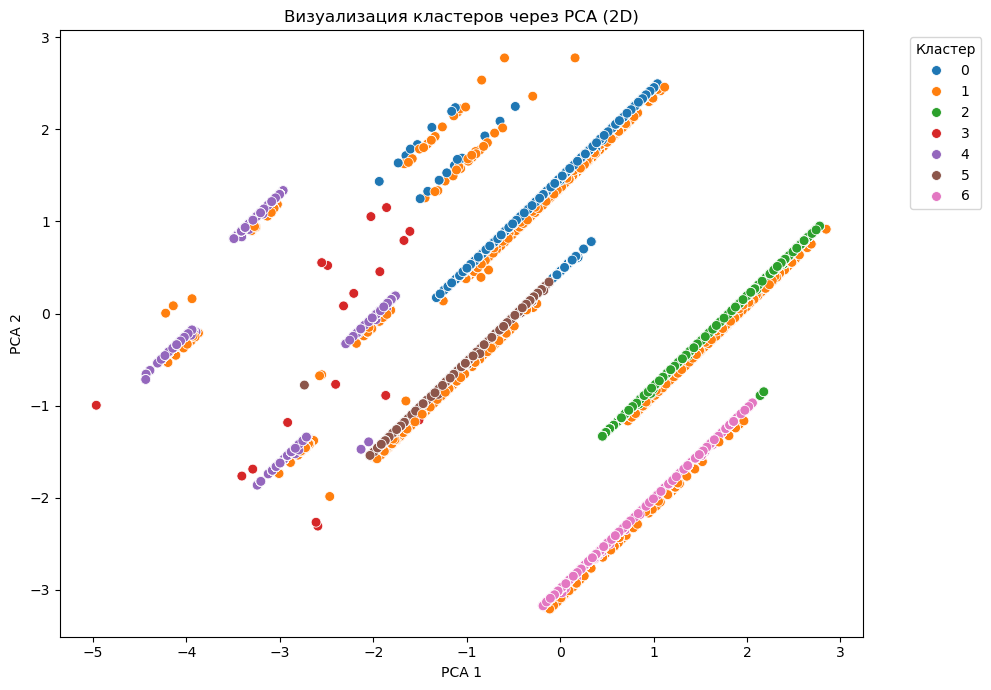

In [80]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.savefig("pca_clusters.png", dpi=300)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=cluster_data, x="pca1", y="pca2", hue="cluster", palette="tab10", s=50)
plt.title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —á–µ—Ä–µ–∑ PCA (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="–ö–ª–∞—Å—Ç–µ—Ä", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [81]:
# –¢–∞–±–ª–∏—Ü–∞ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
summary = cluster_data.groupby("cluster").agg({
    "age": ["min", "max", "mean"],
    "gender_enc": "mean",
    "education_enc": "mean",
    "base_sale": "mean"
}).round(2)
summary

age            gender_enc education_enc base_sale
        min max   mean       mean          mean      mean
cluster                                                  
0        19  77  41.92       1.00          1.00  0.310848
1         6  77  39.84       0.53          0.80  0.375228
2        20  77  42.62       0.00          1.00  0.409758
3        16  50  31.35       0.70          0.65       NaN
4         5  22  15.36       0.67          0.20  0.357614
5        19  66  26.58       1.00          0.00  0.320364
6        19  74  29.11       0.00          0.00  0.392714

In [82]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª–∞ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
gender_distribution = cluster_data.groupby(["cluster", "gender"]).size().unstack().fillna(0)
gender_distribution["%_0"] = (gender_distribution[0] / gender_distribution.sum(axis=1) * 100).round(1)
gender_distribution["%_1"] = (gender_distribution[1] / gender_distribution.sum(axis=1) * 100).round(1)
gender_distribution

gender          0         1    %_0    %_1
cluster                                  
0             0.0  274563.0    0.0  100.0
1          8936.0   10109.0   46.9   52.9
2        247430.0       0.0  100.0    0.0
3             6.0      14.0   30.0   28.0
4         12002.0   24443.0   32.9   67.0
5             0.0   68608.0    0.0  100.0
6         34302.0       0.0  100.0    0.0

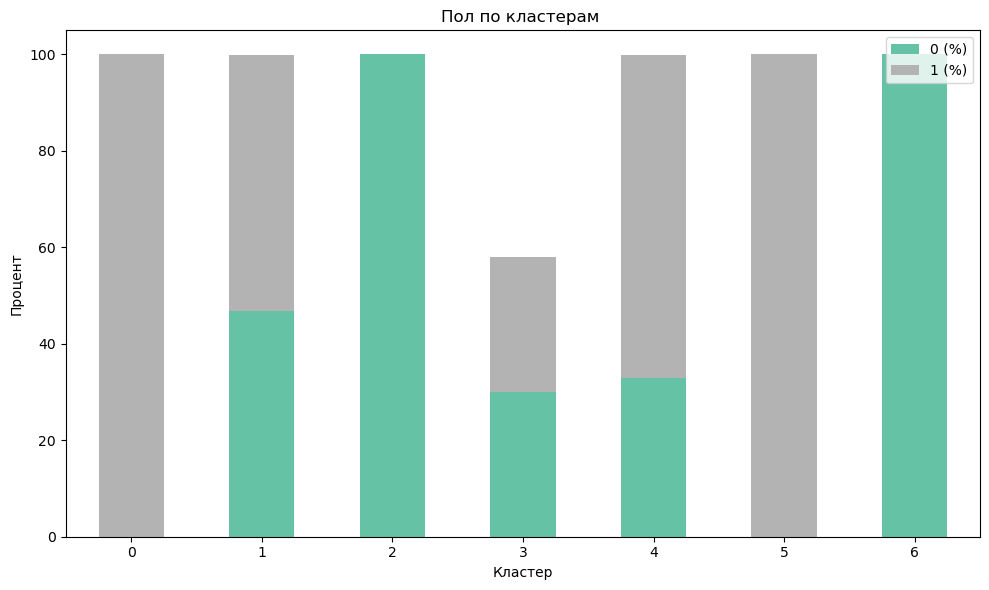

In [83]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
gender_plot_fixed = gender_distribution[["%_0", "%_1"]]
gender_plot_fixed.columns = ["0 (%)", "1 (%)"]
gender_plot_fixed.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2")
plt.title("–ü–æ–ª –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º ")
plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä")
plt.ylabel("–ü—Ä–æ—Ü–µ–Ω—Ç")
plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [84]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
education_distribution = cluster_data.groupby(["cluster", "education"]).size().unstack().fillna(0)
education_distribution_percent = (education_distribution.T / education_distribution.sum(axis=1)).T.round(2) * 100
education_distribution_percent

education  –≤—ã—Å—à–µ–µ  —Å—Ä–µ–¥–Ω–µ–µ
cluster                   
0             0.0    100.0
1            20.0     80.0
2             0.0    100.0
3            35.0     65.0
4            80.0     20.0
5           100.0      0.0
6           100.0      0.0

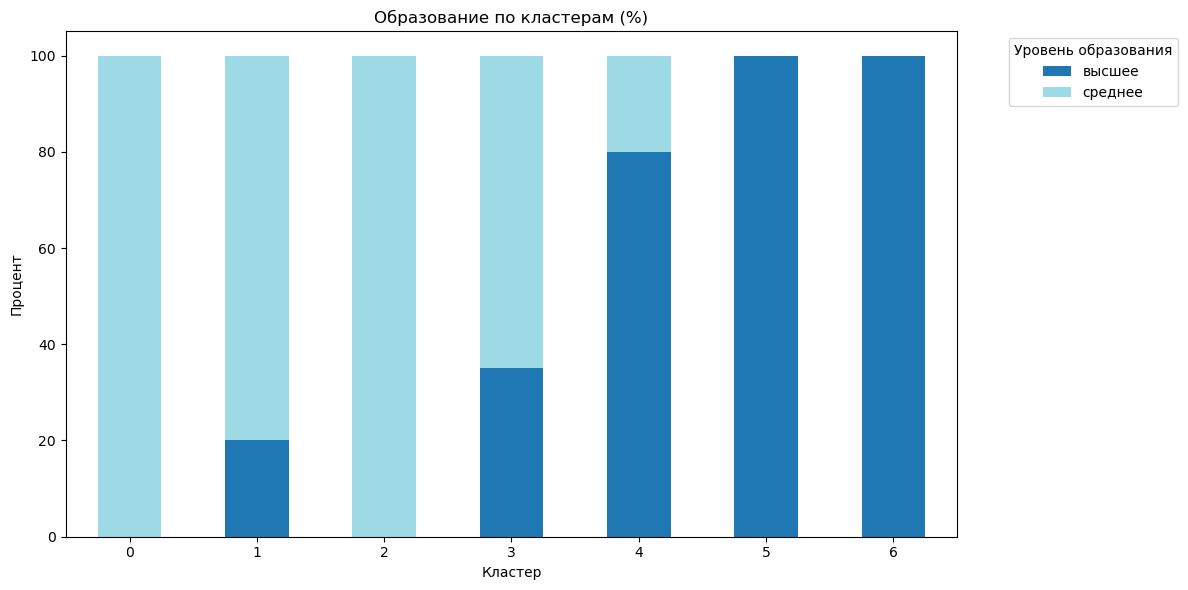

In [85]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
education_distribution_percent.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")
plt.title("–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º (%)")
plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä")
plt.ylabel("–ü—Ä–æ—Ü–µ–Ω—Ç")
plt.legend(title="–£—Ä–æ–≤–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [86]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ç–∞–±–ª–∏—Ü—É –≥–æ—Ä–æ–¥–æ–≤: –∫–ª–∞—Å—Ç–µ—Ä ‚Äî —Ç–æ–ø-3 –≥–æ—Ä–æ–¥–∞
top_3_cities_per_cluster = cluster_data.groupby(["cluster", "city"]).size().reset_index(name="count")
top_3_cities_per_cluster = top_3_cities_per_cluster.sort_values(["cluster", "count"], ascending=[True, False])
top_3_cities = top_3_cities_per_cluster.groupby("cluster")["city"].apply(lambda x: list(x.head(3))).reset_index()
top_3_cities.columns = ["–ö–ª–∞—Å—Ç–µ—Ä", "–¢–æ–ø-3 –≥–æ—Ä–æ–¥–∞"]
top_3_cities

–ö–ª–∞—Å—Ç–µ—Ä        –¢–æ–ø-3 –≥–æ—Ä–æ–¥–∞
0        0  [1134, 1188, 1157]
1        1          [9, 34, 2]
2        2  [1134, 1188, 1178]
3        3     [412, 432, 371]
4        4  [1134, 1188, 1157]
5        5  [1134, 1188, 1157]
6        6  [1134, 1188, 1157]

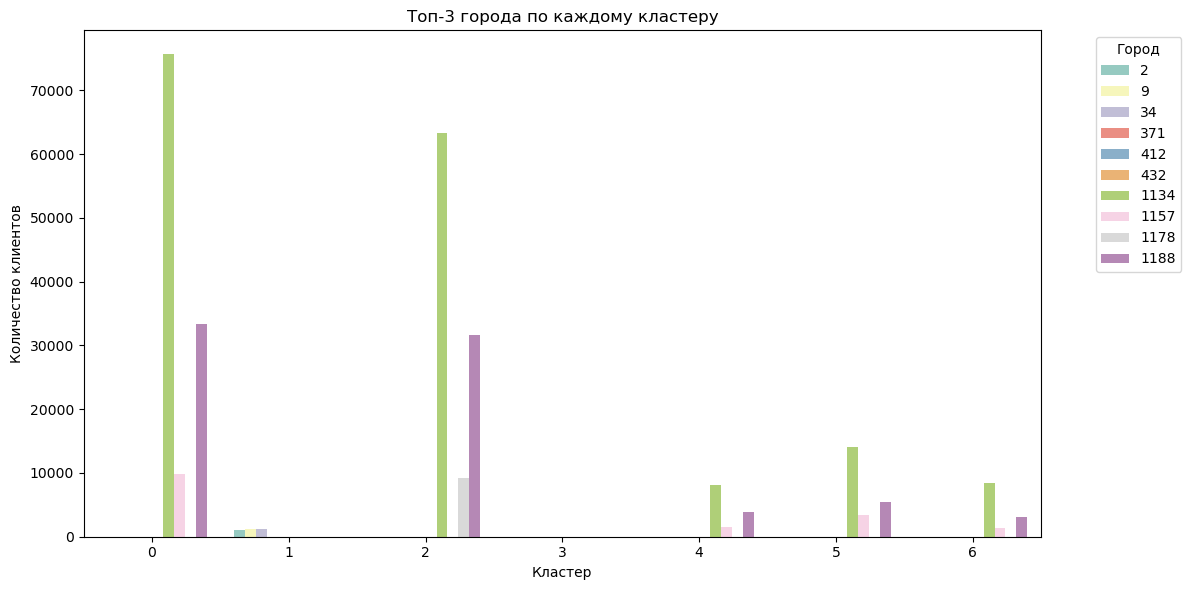

In [87]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–æ–ø-3 –≥–æ—Ä–æ–¥–æ–≤
plt.figure(figsize=(12, 6))
sns.barplot(data=top_3_cities_per_cluster.groupby("cluster").head(3), 
            x="cluster", y="count", hue="city", palette="Set3")
plt.title("–¢–æ–ø-3 –≥–æ—Ä–æ–¥–∞ –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Ç–µ—Ä—É")
plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤")
plt.legend(title="–ì–æ—Ä–æ–¥", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


C:\Users\Evgeniya\AppData\Local\Temp\ipykernel_9412\214178520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y="age", data=cluster_data, palette="Set2")


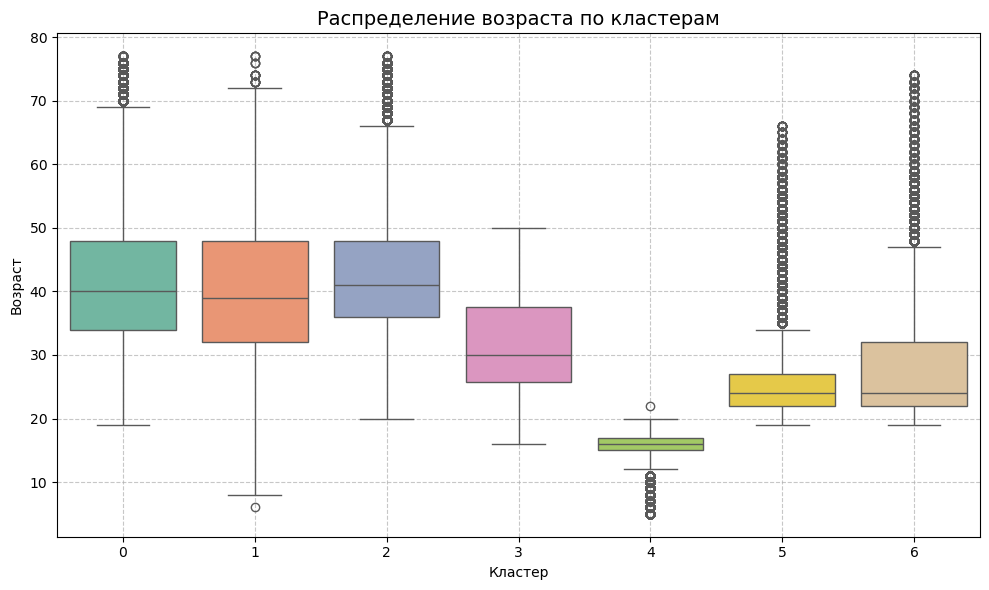

In [88]:
# Boxplot: –í–æ–∑—Ä–∞—Å—Ç –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
plt.figure(figsize=(10, 6))
sns.boxplot(x="cluster", y="age", data=cluster_data, palette="Set2")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º", fontsize=14)
plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä")
plt.ylabel("–í–æ–∑—Ä–∞—Å—Ç")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("boxplot_age_by_cluster.png")  # —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.show()

In [89]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –≤–ª–∏–µ–Ω–∏–µ —Å–∫–∏–¥–æ–∫ –Ω–∞ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º:

# –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∫–∏–¥–æ—á–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫
discount_stats = cluster_data.groupby("cluster")["base_sale"].agg(["count", "sum"]).copy()

# –û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –∫–ª–∞—Å—Ç–µ—Ä—ã –±–µ–∑ –ø–æ–∫—É–ø–æ–∫
discount_stats = discount_stats[discount_stats["count"] > 0]

# –†–∞—Å—á—ë—Ç –¥–æ–ª–∏ —Å–∫–∏–¥–æ—á–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫
discount_stats["discount_rate"] = (discount_stats["sum"] / discount_stats["count"] * 100).round(2)
discount_stats["discount_rate"] = discount_stats["discount_rate"].map("{:.2f}".format)
discount_stats

count    sum discount_rate
cluster                             
0        268234  83380         31.08
1         18602   6980         37.52
2        241960  99145         40.98
4         35502  12696         35.76
5         66877  21425         32.04
6         33490  13152         39.27

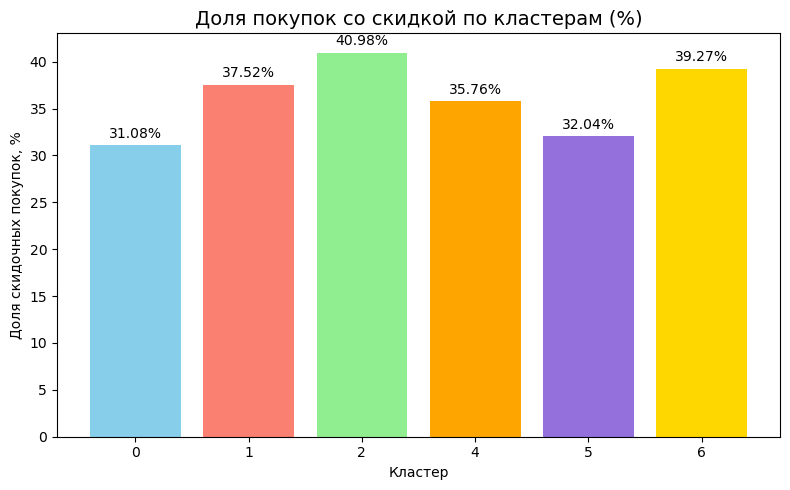

In [90]:
# –ü–æ—Å—Ç–æ—Ä–∏–º –≥—Ä–∞—Ñ–∏–∫

discount_stats["discount_rate"] = pd.to_numeric(discount_stats["discount_rate"], errors='coerce')

plt.figure(figsize=(8, 5))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'mediumpurple', 'gold']

# –°—Ç–æ–ª–±—á–∞—Ç–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ 
bars = plt.bar(discount_stats.index.astype(str), discount_stats["discount_rate"].values, color=colors)

plt.title("–î–æ–ª—è –ø–æ–∫—É–ø–æ–∫ —Å–æ —Å–∫–∏–¥–∫–æ–π –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º (%)", fontsize=14)
plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä")
plt.ylabel("–î–æ–ª—è —Å–∫–∏–¥–æ—á–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫, %")

# –ü–æ–¥–ø–∏—Å–∏ –Ω–∞ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{discount_stats['discount_rate'].values[i]:.2f}%", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


      |
      |
     |
     |
      |


## –µ—Å–ª–∏ —Å—Ä–∞–≤–Ω–∏—Ç—å –Ω–∞–±–æ—Ä —Ç–æ–≤–∞—Ä–æ–≤ –∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª–æ–≤ —Ç–æ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ: 
 - –ö–ª–∞—Å—Ç–µ—Ä—ã 0 –∏ 5 ‚Äî –ø–æ–ª–Ω–æ—Å—Ç—å—é –º—É–∂—Å–∫–∏–µ,
 - –ö–ª–∞—Å—Ç–µ—Ä—ã 2 –∏ 6 ‚Äî –ø–æ–ª–Ω–æ—Å—Ç—å—é –∂–µ–Ω—Å–∫–∏–µ,
 - –ö–ª–∞—Å—Ç–µ—Ä 1 ‚Äî –Ω–∞–∏–±–æ–ª–µ–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π,
 - –ö–ª–∞—Å—Ç–µ—Ä 4 ‚Äî —Å –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–µ–º –º—É–∂—á–∏–Ω.



In [93]:
cluster_data

id  gender  age education  city  country  personal_coef  \
0            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
1            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
2            0       0   36   —Å—Ä–µ–¥–Ω–µ–µ  1201       32         0.5072   
3            4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
4            4       0   35   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
...        ...     ...  ...       ...   ...      ...            ...   
680408  135183       1   44   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.4304   
680409  125993       1   46   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.4304   
680410  167019       0   71   —Å—Ä–µ–¥–Ω–µ–µ  1134       32         0.5072   
680411  116355       1   32   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304   
680412   15885       1   33   —Å—Ä–µ–¥–Ω–µ–µ  1190       32         0.4304   

                                           product   cost base_sale    dt  \
0        –≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π stern mira 20 26  13599         1     7   
1                                  —Å—Ç–æ–ª outventure   1499         0    37   
2                   –Ω–∞–±–æ—Ä outventure —Å—Ç–æ–ª  4 —Å—Ç—É–ª–∞   4799         0    37   
3       —Ä–æ–ª–∏–∫–æ–≤—ã–µ –∫–æ–Ω—å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ roces orlando iii   9199         0     0   
4                                —à–ª–µ–º fila nrk fun   4999         0     0   
...                                            ...    ...       ...   ...   
680408                                        None   None      None  None   
680409                                        None   None      None  None   
680410                                        None   None      None  None   
680411                                        None   None      None  None   
680412                                        None   None      None  None   

        gender_enc  education_enc  cluster      pca1      pca2  
0                0              1        2  1.100663 -0.689523  
1                0              1        2  1.100663 -0.689523  
2                0              1        2  1.100663 -0.689523  
3                0              1        2  1.064232 -0.731686  
4                0              1        2  1.064232 -0.731686  
...            ...            ...      ...       ...       ...  
680408           1              1        0 -0.300816  1.171745  
680409           1              1        0 -0.219223  1.251803  
680410           0              1        2  2.532901  0.709365  
680411           1              1        0 -0.793890  0.693114  
680412           1              1        0 -0.753224  0.733207  

[680413 rows x 16 columns]

In [94]:
cluster_data.isnull().sum()

id                   0
gender               0
age                  0
education            0
city                 0
country              0
personal_coef        0
product          15748
cost             15748
base_sale        15748
dt               15748
gender_enc           0
education_enc        0
cluster              0
pca1                 0
pca2                 0
dtype: int64

In [95]:
cluster_data_cost = cluster_data.dropna(subset=["cost"])

In [96]:
cluster_data_cost.shape

(664665, 16)

In [97]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º –∏ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–∏–π —á–µ–∫
avg_check = cluster_data_cost.groupby("cluster")["cost"].mean().round(2).reset_index()
avg_check.columns = ["–ö–ª–∞—Å—Ç–µ—Ä", "–°—Ä–µ–¥–Ω–∏–π —á–µ–∫"]

avg_check

–ö–ª–∞—Å—Ç–µ—Ä  –°—Ä–µ–¥–Ω–∏–π —á–µ–∫
0        0  6437.937801
1        1  5229.633695
2        2   4084.78239
3        4  5582.405893
4        5  6444.735096
5        6  4716.507883

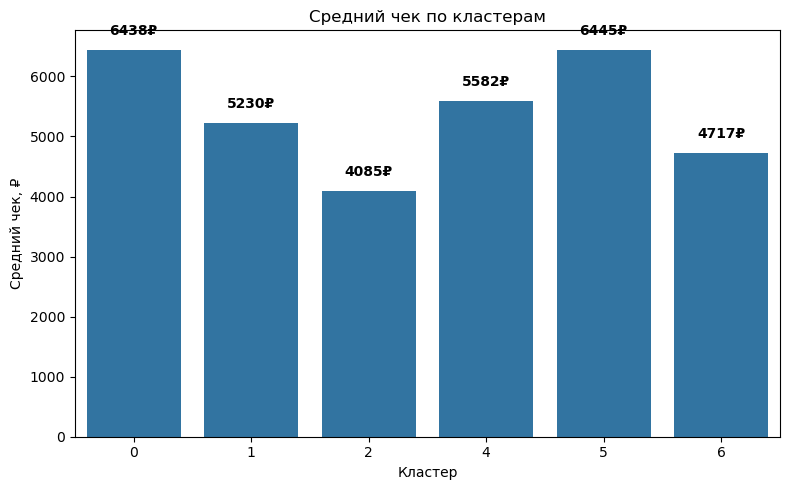

In [98]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(8, 5))
sns.barplot(x="–ö–ª–∞—Å—Ç–µ—Ä", y="–°—Ä–µ–¥–Ω–∏–π —á–µ–∫", data=avg_check)

# –ü–æ–¥–ø–∏—Å–∏ –Ω–∞–¥ —Å—Ç–æ–ª–±—Ü–∞–º–∏
for index, row in avg_check.iterrows():
    plt.text(x=index, y=row["–°—Ä–µ–¥–Ω–∏–π —á–µ–∫"] + 200, s=f'{row["–°—Ä–µ–¥–Ω–∏–π —á–µ–∫"]:.0f}‚ÇΩ', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("–°—Ä–µ–¥–Ω–∏–π —á–µ–∫ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º")
plt.ylabel("–°—Ä–µ–¥–Ω–∏–π —á–µ–∫, ‚ÇΩ")
plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä")
plt.tight_layout()
plt.show()

In [218]:
# –°–≤–æ–¥–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –∫–ª–∞—Å—Ç–µ—Ä–µ

# –ü–æ–¥—Å—á—ë—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
cluster_counts = cluster_data["cluster"].value_counts().sort_index()
cluster_percent = (cluster_counts / cluster_counts.sum() * 100).round(2)

# –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ —Å–≤–æ–¥–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã
summary_table = pd.DataFrame({
    "–ö–ª–∞—Å—Ç–µ—Ä": cluster_counts.index,
    "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤": cluster_counts.values,
    "–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞": cluster_percent.values
}).sort_values(by="–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞", ascending=False)
print(summary_table.to_string(index=False))


 –ö–ª–∞—Å—Ç–µ—Ä  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤  –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞
       0               274563                    40.35
       2               247430                    36.36
       5                68608                    10.08
       4                36445                     5.36
       6                34302                     5.04
       1                19045                     2.80
       3                   20                     0.00


In [220]:
from IPython.display import display, HTML
display(HTML(summary_table.to_html(index=False)))


| **–ö–ª–∞—Å—Ç–µ—Ä** | **–¶–µ–ª–µ–≤–∞—è –∞—É–¥–∏—Ç–æ—Ä–∏—è**                      | **–ü–æ–≤–µ–¥–µ–Ω–∏–µ**                                               | **–¢–æ–ø-3 —Ç–æ–≤–∞—Ä–∞**                                           | **–°–∫–∏–¥–∫–∏**                        | **–°—Ä–µ–¥–Ω–∏–π —á–µ–∫** | **–ö–∞–Ω–∞–ª—ã –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏**                                                                 |
|-------------|---------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------|------------------------------------|------------------|--------------------------------------------------------------------------------------------|
| **0**       | –ú—É–∂—á–∏–Ω—ã ~35 –ª–µ—Ç, —Å—Ä–µ–¥–Ω–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ        | –†–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã, –ø–æ–∫—É–ø–∞—é—Ç –±–µ–∑ –æ—Ä–∏–µ–Ω—Ç–∞—Ü–∏–∏ –Ω–∞ –∞–∫—Ü–∏–∏               | –±—Ä—é–∫–∏, —à–æ—Ä—Ç—ã, —Ñ—É—Ç–±–æ–ª–∫–∏ –º—É–∂—Å–∫–∏–µ Demix                      | ~31% ‚Äî –Ω–∞–∏–º–µ–Ω—å—à–∞—è –¥–æ–ª—è             | ~6‚ÄØ438 ‚ÇΩ         | –†–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥, —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –≤ –õ–ö, push –±–µ–∑ —Å–∫–∏–¥–æ–∫, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –æ –Ω–∞–ª–∏—á–∏–∏ –∏ –Ω–æ–≤–∏–Ω–∫–∞—Ö         |
| **1**       | –ú–æ–ª–æ–¥—ã–µ (28‚Äì32), —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –ø–æ–ª       | –ü—Ä–µ–¥–ø–æ—á–∏—Ç–∞—é—Ç –Ω–µ–¥–æ—Ä–æ–≥—É—é –º—É–∂—Å–∫—É—é –æ–¥–µ–∂–¥—É, —Ä–µ–∞–≥–∏—Ä—É—é—Ç –Ω–∞ —Å–∫–∏–¥–∫–∏  | –±—Ä—é–∫–∏, —à–æ—Ä—Ç—ã, —Ñ—É—Ç–±–æ–ª–∫–∏ –º—É–∂—Å–∫–∏–µ Demix                      | ~37.5% ‚Äî –≤—ã—Å–æ–∫–∞—è —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  | ~5‚ÄØ229 ‚ÇΩ         | –¢–∞—Ä–≥–µ—Ç–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —Ä–µ–∫–ª–∞–º–∞, –∫—ç—à–±–µ–∫, mobile-first –º–∞—Ä–∫–µ—Ç–∏–Ω–≥                                  |
| **2**       | –ñ–µ–Ω—â–∏–Ω—ã 38+, –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —Å—Ä–µ–¥–Ω–µ–µ –æ–±—Ä.   | –ß–∞—Å—Ç–æ –ø–æ–∫—É–ø–∞—é—Ç –æ–¥–µ–∂–¥—É –¥–ª—è –ø–ª–∞–≤–∞–Ω–∏—è –∏ –æ—Ç–¥—ã—Ö–∞, —Ä–µ–∞–≥–∏—Ä—É—é—Ç –Ω–∞ –∞–∫—Ü–∏–∏ | —Ñ—É—Ç–±–æ–ª–∫–∏, –ª–∏—Ñ—ã, –∫—É–ø–∞–ª—å–Ω–∏–∫–∏ –∂–µ–Ω—Å–∫–∏–µ (Joss, Demix)     | ~41% ‚Äî –Ω–∞–∏–±–æ–ª—å—à–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å      | ~4‚ÄØ084 ‚ÇΩ         | –†–µ–∫–ª–∞–º–Ω—ã–µ –±–∞–Ω–Ω–µ—Ä—ã, –æ—Ñ–ª–∞–π–Ω-–∞–∫—Ü–∏–∏, SMS –∏ Viber —Ä–∞—Å—Å—ã–ª–∫–∏                                     |
| **3**       | –ú–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–π —Å–µ–≥–º–µ–Ω—Ç, –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ | –ü–æ–≤–µ–¥–µ–Ω–∏–µ –Ω–µ –≤—ã—è–≤–ª–µ–Ω–æ, –≤—ã–±–æ—Ä —Å–ª—É—á–∞–π–Ω—ã–π                      | -                                                          | -                                  | -                | –¢—Ä–µ–±—É–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏–ª–∏ –∏—Å–∫–ª—é—á–µ–Ω–∏—è –∏–∑ —Ç–∞—Ä–≥–µ—Ç–∏–Ω–≥–∞                              |
| **4**       | –ú—É–∂—á–∏–Ω—ã –∏ –∂–µ–Ω—â–∏–Ω—ã ~33, –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –≤—ã—Å—à–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ | –ß—ë—Ç–∫–∏–π –≤—ã–±–æ—Ä, –±—Ä–µ–Ω–¥–æ–≤—ã–µ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è             | –±—Ä—é–∫–∏, —à–æ—Ä—Ç—ã Nike –∏ Demix                                | ~36% ‚Äî –≤–∞–∂–Ω—ã –∞–∫—Ü–∏–∏ –Ω–∞ –±—Ä–µ–Ω–¥—ã       | ~5‚ÄØ582 ‚ÇΩ         | –†–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥, –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –≤ –∫–∞–±–∏–Ω–µ—Ç–µ                                          |
| **5**       | –ú—É–∂—á–∏–Ω—ã ~40+, –≤—ã—Å—à–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ            | –ü–æ–∫—É–ø–∞—é—Ç –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é –æ–¥–µ–∂–¥—É, –º–µ–Ω–µ–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã –∫ —Å–∫–∏–¥–∫–∞–º | —à–æ—Ä—Ç—ã, –±—Ä—é–∫–∏, —Ñ—É—Ç–±–æ–ª–∫–∏ –º—É–∂—Å–∫–∏–µ Demix                     | ~32% ‚Äî —Å–∫–∏–¥–∫–∏ –≤–∞–∂–Ω—ã, –Ω–æ –Ω–µ –∫—Ä–∏—Ç–∏—á–Ω—ã | ~6‚ÄØ445 ‚ÇΩ         | YouTube/Telegram, —Å–ø–µ—Ü–ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –ø–æ –ø—Ä–µ–¥–∑–∞–∫–∞–∑—É                                           |
| **6**       | –ñ–µ–Ω—â–∏–Ω—ã 30‚Äì40 –ª–µ—Ç                           | –°–ø–æ—Ä—Ç –∏ –¥–æ—Å—É–≥, —Å—Ä–µ–¥–Ω—è—è —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫ —Å–∫–∏–¥–∫–µ            | —Ñ—É—Ç–±–æ–ª–∫–∞, –ª–µ–≥–∏–Ω—Å—ã –∂–µ–Ω—Å–∫–∏–µ Demix, –±—Ä—é–∫–∏ Outventure        | ~39% ‚Äî —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤—ã—Å–æ–∫–∞—è    | ~4‚ÄØ716 ‚ÇΩ         | –ò–Ω—Ñ–ª—é–µ–Ω—Å–µ—Ä-–º–∞—Ä–∫–µ—Ç–∏–Ω–≥, –ø–æ–¥–±–æ—Ä–∫–∏ –¥–ª—è –∂–µ–Ω—â–∏–Ω, –∫–∞–Ω–∞–ª—ã –¥–ª—è —Å–ø–æ—Ä—Ç–∞/—Ñ–∏—Ç–Ω–µ—Å–∞                      |
      |


### **–°—Ç—Ä–∞—Ç–µ–≥–∏—á–µ—Å–∫–æ–µ –¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–≤–µ–¥–µ–Ω—á–µ—Å–∫–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º**:
 -  **–ü—Ä–µ–º–∏—É–º-–∫–ª–∞—Å—Ç–µ—Ä—ã**: 0, 5  
  _–†–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–µ, –ø–ª–∞—Ç—ë–∂–µ—Å–ø–æ—Å–æ–±–Ω—ã–µ –º—É–∂—á–∏–Ω—ã. –ü—Ä–æ–¥–≤–∏–∂–µ–Ω–∏–µ —á–µ—Ä–µ–∑ —Å–ø–µ—Ü–ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è, —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –∏ –ø—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç_ 
  _ -  üí∏ **–ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ –∫ —Ü–µ–Ω–µ**: 1, 2, 6  
  _–û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω—ã –Ω–∞ —Å–∫–∏–¥–∫–∏, —Ä–∞—Å–ø—Ä–æ–¥–∞–∂–∏ –∏ –±—ã—Å—Ç—Ä—É—é –ø–æ–∫—É–ø–∫—É. –ê–∫—Ç—É–∞–ª—å–Ω—ã push, –ø—Ä–æ–º–æ–∫–æ–¥—ã, —Å–æ—Ü—Å–µ—Ç - 
- üëï **–¶–µ–Ω–∏—Ç–µ–ª–∏ –±—Ä–µ–Ω–¥–æ–≤**: 4  
  _–í—ã—Å–æ–∫–∏–π —Å—Ä–µ–¥–Ω–∏–π —á–µ–∫, –æ—Å–æ–∑–Ω–∞–Ω–Ω—ã–π –≤—ã–±–æ—Ä, –≤–∞–∂–Ω–æ –ø—Ä–æ–¥–≤–∏–≥–∞—Ç—å —á–µ—Ä–µ–∑ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –∫–æ–Ω—Ç–µ–Ω—Ç –∏ –ø–µ—Ä—Å–æ–Ω–∞–ª–∏–∑ - ._

- ‚ùì **–ö–ª–∞—Å—Ç–µ—Ä 3**:  
  _–ú–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–π –∏ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω—ã–π. –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è —É–≥–ª—É–±–ª—ë–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –∏–ª–∏ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ –∏–∑ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏._

---

# 5. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å–∫–ª–æ–Ω–Ω–æ—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–∞ –∫ –ø–æ–∫—É–ø–∫–µ

## 1. –û—Ç–±–æ—Ä –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ (—Ä–µ–∞–ª—å–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏)

In [103]:
# –§–∏–ª—å—Ç—Ä—É–µ–º –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–∑ –≥–æ—Ä–æ–¥–∞ 1188
purchase_positive = cluster_data[(cluster_data["city"] == 1188)].copy()

# –£–¥–∞–ª–∏–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∏ –Ω–µ–Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
purchase_positive = purchase_positive.dropna(subset=["product", "cost"])

# –î–æ–±–∞–≤–∏–º –∫–æ–ª–æ–Ω–∫—É 'target' = 1 (–ø–æ–∫—É–ø–∫–∞ –±—ã–ª–∞)
purchase_positive["target"] = 1
purchase_positive.head()

id  gender  age education  city  country  personal_coef  \
10   6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304   
11   6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304   
12   6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304   
13   6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304   
14   6       1   52   —Å—Ä–µ–¥–Ω–µ–µ  1188       32         0.4304   

                                        product  cost base_sale  dt  \
10  –∫—Ä–æ—Å—Å–æ–≤–∫–∏ –¥–ª—è –º–∞–ª—å—á–∏–∫–æ–≤ geox j sprintye boy  4999         0   1   
11      –∫–µ–¥—ã –º—É–∂—Å–∫–∏–µ reebok royal complete cln2  4799         1   3   
12        —Ñ—É—Ç–±–æ–ª–∫–∞ –º—É–∂—Å–∫–∞—è kappa authentic core   999         0   8   
13        –±–µ–π—Å–±–æ–ª–∫–∞ –¥–µ—Ç—Å–∫–∞—è nike futura mash up  1119         1  11   
14                   –Ω–æ—Å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ demix 2 –ø–∞—Ä—ã   299         0  11   

    gender_enc  education_enc  cluster      pca1      pca2  target  
10           1              1        0  0.022038  1.493698       1  
11           1              1        0  0.022038  1.493698       1  
12           1              1        0  0.022038  1.493698       1  
13           1              1        0  0.022038  1.493698       1  
14           1              1        0  0.022038  1.493698       1

In [104]:
purchase_positive.isnull().sum()

id               0
gender           0
age              0
education        0
city             0
country          0
personal_coef    0
product          0
cost             0
base_sale        0
dt               0
gender_enc       0
education_enc    0
cluster          0
pca1             0
pca2             0
target           0
dtype: int64

## 2. –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤

In [106]:
# –í—Å–µ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ —Ç–æ–≤–∞—Ä—ã
unique_products = cluster_data["product"].dropna().unique()
unique_products

array(['–≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–Ω—ã–π –∂–µ–Ω—Å–∫–∏–π stern mira 20 26', '—Å—Ç–æ–ª outventure',
       '–Ω–∞–±–æ—Ä outventure —Å—Ç–æ–ª  4 —Å—Ç—É–ª–∞', ...,
       '–±–∞—Ç–æ–Ω—á–∏–∫ –ø—Ä–æ—Ç–µ–∏–Ω–æ–≤—ã–π forsio 40 –≥ 30 —à—Ç',
       '—Ñ—É—Ç–±–æ–ª–∫–∞ –º—É–∂—Å–∫–∞—è reebok united by fitness',
       '–±—É—Ç—Å—ã –º—É–∂—Å–∫–∏–µ adidas predator 193 tf'], dtype=object)

In [107]:
# –°—Ñ–æ—Ä–º–∏—Ä—É–µ–º –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã
negatives = []

for _, row in purchase_positive.iterrows():
    for _ in range(2):  # –¥–≤–∞ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞ –Ω–∞ –æ–¥–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞
        random_product = random.choice(unique_products)
        # –ï—Å–ª–∏ –Ω–µ –ø–æ–∫—É–ø–∞–ª —ç—Ç–æ—Ç —Ç–æ–≤–∞—Ä
        if random_product not in purchase_positive[purchase_positive["id"] == row["id"]]["product"].values:
            negatives.append({
                "id": row["id"],
                "gender_enc": row["gender_enc"],
                "age": row["age"],
                "education_enc": row["education_enc"],
                "personal_coef": row["personal_coef"],
                "product": random_product,
                "target": 0})

purchase_negative = pd.DataFrame(negatives)
purchase_negative.head()

id  gender_enc  age  education_enc  personal_coef  \
0   6           1   52              1         0.4304   
1   6           1   52              1         0.4304   
2   6           1   52              1         0.4304   
3   6           1   52              1         0.4304   
4   6           1   52              1         0.4304   

                                        product  target  
0                     –ø–æ–ª–æ –º—É–∂—Å–∫–æ–µ babolat perf       0  
1         –Ω–∞–¥—Å—Ç–∞–≤–∫–∞ –¥–ª—è —Ö–æ–∫–∫–µ–π–Ω—ã—Ö –∫–ª—é—à–µ–∫ madguy       0  
2                  –∫—Ä–æ—Å—Å–æ–≤–∫–∏ –º—É–∂—Å–∫–∏–µ gsd castle       0  
3  –≤–µ–ª–æ—Å–∏–ø–µ–¥ –≥–æ—Ä–æ–¥—Å–∫–æ–π trek fx 3 disc 700c 2022       0  
4     —Ñ—É—Ç–±–æ–ª–∫–∞ –º—É–∂—Å–∫–∞—è the north face lightning       0

## 3. –û–±—ä–µ–¥–∏–Ω—è–µ–º –ø–æ–∫—É–ø–∫–∏ –∏ –Ω–µ –ø–æ–∫—É–ø–∫–∏

In [109]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ
features_pos = purchase_positive[["id", "gender_enc", "age", "education_enc", "personal_coef", "product", "target"]]

# –û–±—ä–µ–¥–∏–Ω—è–µ–º
df_model = pd.concat([features_pos, purchase_negative], ignore_index=True)
df_model.head()

id  gender_enc  age  education_enc  personal_coef  \
0   6           1   52              1         0.4304   
1   6           1   52              1         0.4304   
2   6           1   52              1         0.4304   
3   6           1   52              1         0.4304   
4   6           1   52              1         0.4304   

                                       product  target  
0  –∫—Ä–æ—Å—Å–æ–≤–∫–∏ –¥–ª—è –º–∞–ª—å—á–∏–∫–æ–≤ geox j sprintye boy       1  
1      –∫–µ–¥—ã –º—É–∂—Å–∫–∏–µ reebok royal complete cln2       1  
2        —Ñ—É—Ç–±–æ–ª–∫–∞ –º—É–∂—Å–∫–∞—è kappa authentic core       1  
3        –±–µ–π—Å–±–æ–ª–∫–∞ –¥–µ—Ç—Å–∫–∞—è nike futura mash up       1  
4                   –Ω–æ—Å–∫–∏ –¥–µ—Ç—Å–∫–∏–µ demix 2 –ø–∞—Ä—ã       1

In [110]:
df_model.shape

(226389, 7)

## 4. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [112]:
le_product = LabelEncoder()
df_model["product_enc"] = le_product.fit_transform(df_model["product"])

In [113]:
X = df_model[["gender_enc", "age", "education_enc", "personal_coef", "product_enc"]]
y = df_model["target"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# –ü—Ä–æ–≤–µ—Ä–∏–º –∫–∞—á–µ—Å—Ç–≤–æ
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     45267
           1       0.58      0.60      0.59     22650

    accuracy                           0.72     67917
   macro avg       0.69      0.69      0.69     67917
weighted avg       0.72      0.72      0.72     67917



## –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
–ú–æ–¥–µ–ª—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ —Ä–∞—Å–ø–æ–∑–Ω–∞—ë—Ç —Ç–µ—Ö, –∫—Ç–æ –Ω–µ –ø–æ–∫—É–ø–∞–µ—Ç —Ç–æ–≤–∞—Ä (–∫–ª–∞—Å—Å 0) ‚Äî —Ç–æ—á–Ω–æ—Å—Ç—å 80%.

–î–ª—è –∫–ª–∞—Å—Å–∞ 1 (—Ç–µ—Ö, –∫—Ç–æ –ø–æ–∫—É–ø–∞–µ—Ç —Ç–æ–≤–∞—Ä) –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–æ, –Ω–æ –Ω–µ –∏–¥–µ–∞–ª—å–Ω–æ:

F1-score = 0.59 ‚Äî —ç—Ç–æ –∫–æ–º–ø—Ä–æ–º–∏—Å—Å –º–µ–∂–¥—É —Ç–æ—á–Ω–æ—Å—Ç—å—é –∏ –ø–æ–ª–Ω–æ—Ç–æ–π.

Recall (60%) ‚Äî –º–æ–¥–µ–ª—å –ª–æ–≤–∏—Ç 60% –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–µ–º–ª–µ–º–æ –¥–ª—è –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞.

–û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å ‚Äî 72%, —á—Ç–æ –¥–ª—è –∑–∞–¥–∞—á–∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ —Ç–æ–≤–∞—Ä–æ–≤ ‚Äî –≤–ø–æ–ª–Ω–µ —Ä–∞–±–æ—á–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

## –í—ã–≤–æ–¥—ã –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:

 - –ú–æ–¥–µ–ª—å –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –ø—Ä–∏–æ—Ä–∏—Ç–∏–∑–∞—Ü–∏–∏ —Ä–∞—Å—Å—ã–ª–æ–∫ –∏ —Ç–æ–≤–∞—Ä–Ω—ã—Ö –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π: –∑–∞–ø—É—Å–∫–∞—Ç—å –∫–∞–º–ø–∞–Ω–∏–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –ø–æ–∫—É–ø–∫–∏.

 - –ß—Ç–æ–±—ã —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ:
                            —É—á–µ—Å—Ç—å –ø–æ–≤—Ç–æ—Ä–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏,

                            –¥–æ–±–∞–≤–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –æ –ø—Ä–æ—à–ª—ã—Ö —Ä–µ–∞–∫—Ü–∏—è—Ö –Ω–∞ –∞–∫—Ü–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ base_sale),

                            –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Ç–æ–≤–∞—Ä–∞ –∏–ª–∏ –±—Ä–µ–Ω–¥–∞.

F1-score –≤ —Ä–∞–π–æ–Ω–µ 0.59 ‚Äî —ç—Ç–æ —Ö–æ—Ä–æ—à–∏–π —Å—Ç–∞—Ä—Ç –¥–ª—è —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ç–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –±–µ–∑ –ø–æ–≤–µ–¥–µ–Ω—á–µ—Å–∫–∏—Ö –º–µ—Ç–æ–∫ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–ª–∏–∫–æ–≤, –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤).